# SQLAlchemy Homework - Surfs Up!

### Before You Begin

1. Create a new repository for this project called `sqlalchemy-challenge`. **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Add your Jupyter notebook and `app.py` to this folder. These will be the main scripts to run for analysis.

4. Push the above changes to GitHub or GitLab.

![surfs-up.png](Images/surfs-up.png)

Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area. The following outlines what you need to do.

## Step 1 - Climate Analysis and Exploration

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Use the provided [starter notebook](climate_starter.ipynb) and [hawaii.sqlite](Resources/hawaii.sqlite) files to complete your climate analysis and data exploration.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

  ![precipitation](Images/precipitation.png)

* Use Pandas to print the summary statistics for the precipitation data.

### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order.

  * Which station has the highest number of observations?

  * Hint: You may need to use functions such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

    ![station-histogram](Images/station-histogram.png)

- - -

## Step 2 - Climate App

Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

* Use FLASK to create your routes.

### Routes

* `/`

  * Home page.

  * List all routes that are available.

* `/api/v1.0/precipitation`

  * Convert the query results to a Dictionary using `date` as the key and `prcp` as the value.

  * Return the JSON representation of your dictionary.

* `/api/v1.0/stations`

  * Return a JSON list of stations from the dataset.

* `/api/v1.0/tobs`
  * query for the dates and temperature observations from a year from the last data point.
  * Return a JSON list of Temperature Observations (tobs) for the previous year.

* `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`

  * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.

  * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.

  * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.

## Hints

* You will need to join the station and measurement tables for some of the analysis queries.

* Use Flask `jsonify` to convert your API data into a valid JSON response object.

- - -

### Optional: Other Recommended Analyses

* The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.

### Temperature Analysis I

* Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

* You may either use SQLAlchemy or pandas's `read_csv()` to perform this portion.

* Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.

* Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

### Temperature Analysis II

* The starter notebook contains a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

    ![temperature](Images/temperature.png)

### Daily Rainfall Average

* Calculate the rainfall per weather station using the previous year's matching dates.

* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.

* You are provided with a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic tobs that match that date string.

* Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

* Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

* Use Pandas to plot an area plot (`stacked=False`) for the daily normals.

  ![daily-normals](Images/daily-normals.png)

### Copyright

Trilogy Education Services © 2019. All Rights Reserved.


In [69]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [70]:
import numpy as np
import pandas as pd

In [71]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [72]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect


In [73]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [74]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [75]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [76]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [77]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [239]:
inspector = inspect(engine)

# Get column information
columns = inspector.get_columns("Station")
for c in columns:
    print(c["name"], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [79]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
currentdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
currentdate

query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [80]:
# Perform a query to retrieve the data and precipitation scores
twelvemonths = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= query_date).all()

In [81]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(twelvemonths)
prcp_df

# convert Date to object for plot
prcp_df['date'] = pd.to_datetime(prcp_df['date'])

#reindex and rename
prcp_df = prcp_df.set_index('date')                                      
prcp_df.rename(columns = {'prcp': 'precipitation'}, inplace=True)          
prcp_df.head()

# Sort the dataframe by date
prcp_sorted = prcp_df.sort_values(by='date', ascending=True)
prcp_sorted.head()


,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


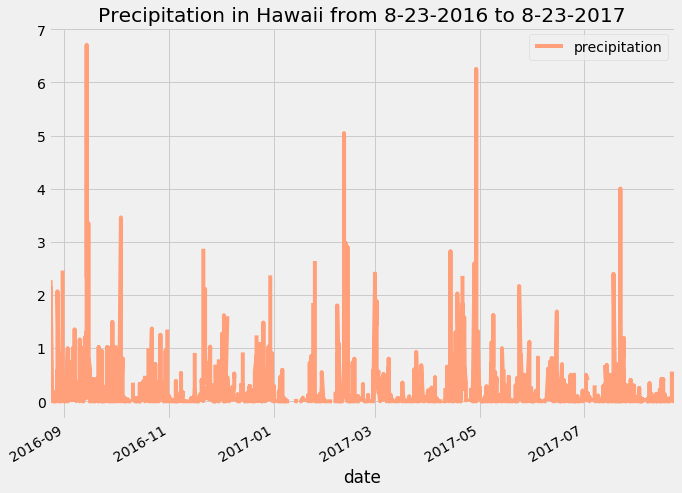

In [225]:
# Use Pandas Plotting with Matplotlib to plot the data

# plt.plot(figsize=(30,20))
# plt.plot(prcp_sorted.date,prcp_sorted.prcp)

prcp_sorted.plot(figsize=(10,8),                                              
               title='Precipitation in Hawaii from 8-23-2016 to 8-23-2017',
                color="lightsalmon")
plt.show()

![precipitation](Images/precipitation.png)

In [83]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_sorted.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [186]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.id).count() 
# rows = len(active_df)
print(f'There are {station_count} weather stations in Hawaii.')

There are 9 weather stations in Hawaii.


In [89]:
# Query for most station activity
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
                group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
# List the stations and the counts in descending order
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [197]:
# Most Active Station
most_active = session.query(Measurement.station,func.count(Measurement.tobs)).\
                group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
most_active = most_active[0]
print(f"Station {most_active} has the highest number of observations.")

Station USC00519281 has the highest number of observations.


In [206]:
# Using the station id from the previous query, calculate the lowest temperature recorded
# highest temperature recorded, and average temperature of the most active station?
most_active_station_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == most_active, Measurement.station == Station.station,\
       Measurement.date >="2016-08-23", Measurement.date <="2017-08-23").all()

# Store temperatures in a list
temps = [temp[0] for temp in most_active_station_tobs]

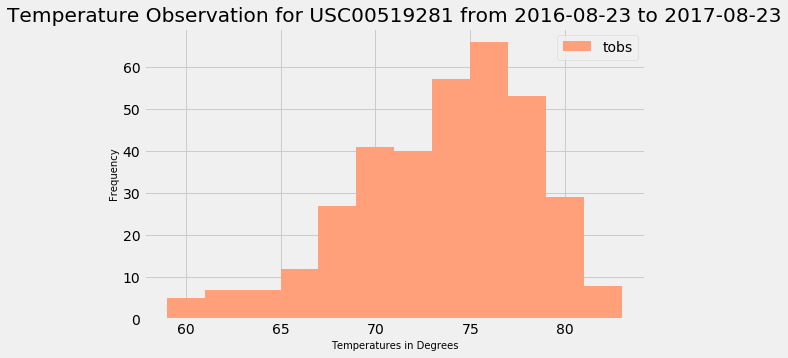

In [226]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize=(8,5))
plt.hist(temps, bins=12, color="lightsalmon")                          
plt.title(f'Temperature Observation for {most_active} from 2016-08-23 to 2017-08-23')
plt.ylabel('Frequency', size=10)
plt.xlabel('Temperatures in Degrees', size=10)
labels = ['tobs']
plt.legend(labels)
plt.show()

![precipitation](Images/station-histogram.png)

In [123]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [126]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# year_ago = calc_temps('2017-06-28', '2017-07-05')
# print(year_ago)

In [134]:
start_date = '2017-06-28'
end_date = '2017-07-05'
[(temp_min, temp_avg, temp_max)] = calc_temps(start_date, end_date)

print(f"My trip starts on {start_date} and ends on {end_date}. \
For the range of dates, the min temperature is {round(temp_min)} degrees, \
mean temperature is {round(temp_avg)} degrees, and maximum temperature is {round(temp_max)} degrees.")

My trip starts on 2017-06-28 and ends on 2017-07-05. For the range of dates, the min temperature is 74 degrees, mean temperature is 78 degrees, and maximum temperature is 87 degrees.


Text(0.5, 1.0, 'Trip AVG Temp')

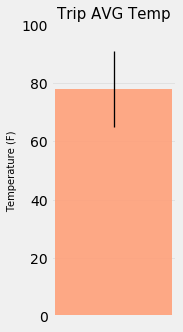

In [227]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value

# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(2,5))
plt.bar(0, temp_avg, color="lightsalmon", width=1.4, 
        alpha=0.9, yerr=temp_max-temp_min, error_kw={"linewidth":1.3})
plt.grid(linestyle='-', linewidth='0.5', color='lightgrey')
plt.gca().set_axisbelow(True)
plt.gca().set_xticks([])
plt.xlim((-.75, .75))
plt.ylim((0, 100))
plt.ylabel("Temperature (F)", size = 10)
plt.title("Trip AVG Temp", size = 15)


In [254]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall = session.query(Measurement.station,func.sum(Measurement.prcp).\
                         label('precipitation')).group_by(Measurement.station).\
                         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).order_by(func.sum(Measurement.prcp).desc()).all()
rainfall_df = pd.DataFrame(rainfall).set_index("station")
rainfall_df

,precipitation
station,
USC00516128,1.26
USC00519281,0.47
USC00513117,0.35
USC00519397,0.20
USC00517948,0.12
USC00519523,0.09
USC00514830,0.00


## Optional Challenge Assignment

In [245]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
